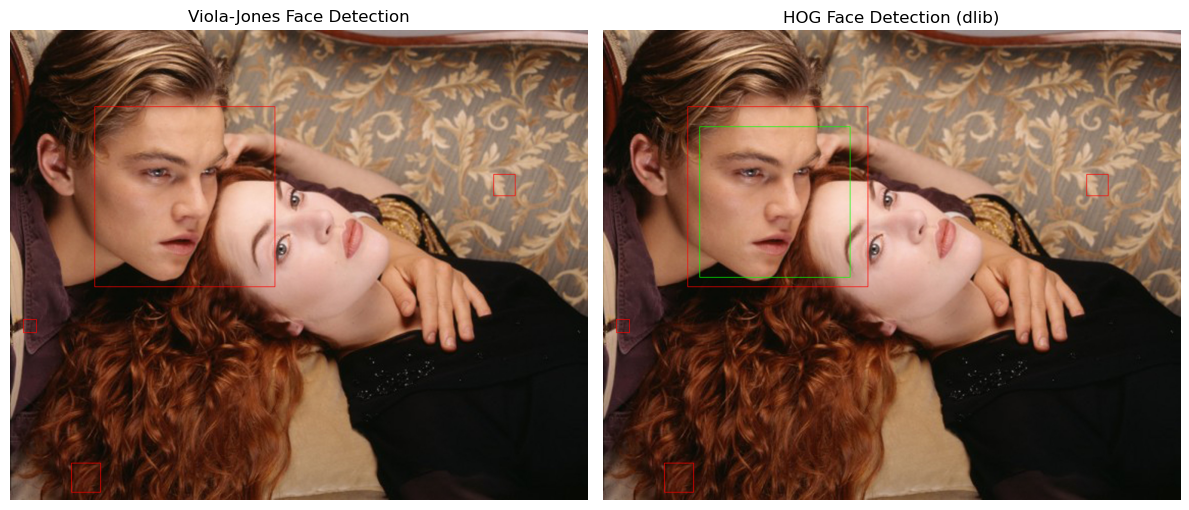

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib

image_path = '/Users/iWolfer/Desktop/Pycharm/homework(pds6)/Lessons 60+/65/titanic.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# запускаємо Віолу-Джонса
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Застосувуємо детектора облич Віоли-Джонса
faces_viola = face_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Ініціалізація HOG (з використанням бібліотеки dlib)
hog_face_detector = dlib.get_frontal_face_detector()

# Застосування HOG
dlib_faces = hog_face_detector(image, 1)

# Відображення результатів
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for (x, y, w, h) in faces_viola:
    cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)
plt.imshow(image_rgb)
plt.title('Viola-Jones Face Detection')
plt.axis('off')

plt.subplot(1, 2, 2)
for face_rect in dlib_faces:
    x, y, w, h = face_rect.left(), face_rect.top(), face_rect.width(), face_rect.height()
    cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(image_rgb)
plt.title('HOG Face Detection (dlib)')
plt.axis('off')

plt.tight_layout()
plt.show()
